# Data Science Regression Project: Melanoma Tumor Size Prediction

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
import seaborn as sns

# Data Load: Melanoma Tumor Size into a dataframe

In [14]:
data_train = pd.read_csv(r'E:/Data_Sets/Train_15.csv')
test  = pd.read_csv(r'E:/Data_Sets/Test_15.csv')

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [5]:
data_train.describe()

mass_npea    size_npear  malign_ratio  damage_size  exposed_area  \
count   9146.000000   9146.000000   9146.000000  9146.000000  9.146000e+03   
mean    9903.052174   3032.827837      0.303083   103.902118  1.372442e+06   
std     4060.577116   1462.334147      0.062533    55.456862  5.646773e+05   
min     2864.760000    510.530000      0.114820    10.310100  3.878534e+05   
25%     6988.420000   1983.657500      0.259053    64.012525  9.596873e+05   
50%     8895.965000   2684.330000      0.301055    88.458300  1.237057e+06   
75%    12119.950000   3830.745000      0.343002   134.209000  1.693083e+06   
max    36995.400000  13535.000000      0.525300   346.420000  4.978616e+06   

       std_dev_malign    err_malign  malign_penalty  damage_ratio   tumor_size  
count     9146.000000   9146.000000     9146.000000   9146.000000  9146.000000  
mean       146.304239   3992.936256       69.849661     34.461652     7.723348  
std         70.512177   1780.672859       55.785332      5.972808     6.086852  
min         31.970400   1089.190000        0.000000     15.228000     0.000000  
25%         95.853900   3177.682500       31.000000     30.290225     2.320000  
50%        126.138500   3846.320000       54.000000     35.245750     5.060500  
75%        182.251500   4664.577500       91.000000     38.806075    13.336000  
max        528.890000  91983.700000      340.000000     46.546400    20.999000

### From the above cell it can be noticed that majority of the columns have outliers 
#### For outlier detection check the mean, standard deviation and max value (here variation is huge between max value and other two values)

#### Converting the columns with value "0" to "1" so that its log value changes to "0" nor it will be indefinite

## Feature Engineering

### Transforming and Binning values
####  Transforming variables can also eliminate outliers. Natural log of a value reduces the variation caused by extreme values. Binning is also a form of variable transformation

#### Data Distribution with outliers

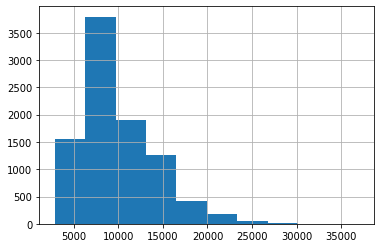

In [6]:
data_train.mass_npea.hist()

#### Data Distribution after doing transformation

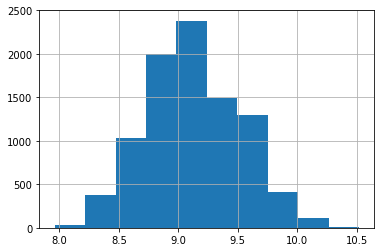

In [7]:
data_train.mass_npea.apply(np.log).hist()

In [15]:
data_train['malign_penalty'][data_train['malign_penalty'] == 0] = 1
data_train['tumor_size'][data_train['tumor_size'] == 0]         = 1

C:\Users\AAA\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\AAA\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
train_log = data_train.apply(np.log)
train_log.head()

mass_npea  size_npear  malign_ratio  damage_size  exposed_area  \
0   8.843745    7.979003     -0.864742     3.947965     13.804277   
1   9.657312    8.492769     -1.164560     5.409635     14.537452   
2   9.247270    7.868591     -1.378683     4.846837     14.176450   
3   9.479894    8.414066     -1.065835     5.046260     14.410049   
4   8.928668    7.966365     -0.962308     4.444105     13.858491   

   std_dev_malign  err_malign  malign_penalty  damage_ratio  tumor_size  
0        4.695806    7.922537        4.276666      3.672801    2.646388  
1        5.516975    8.691572        5.480639      3.092192    0.973805  
2        5.075755    8.441448        4.290459      3.401074    0.523544  
3        5.153378    8.570520        3.465736      3.337029    1.333948  
4        4.823615    8.090510        4.043051      3.555919    2.891649

In [17]:
train_log.describe()

mass_npea   size_npear  malign_ratio  damage_size  exposed_area  \
count  9146.000000  9146.000000   9146.000000  9146.000000   9146.000000   
mean      9.122697     7.906964     -1.215750     4.513548     14.053139   
std       0.392687     0.473793      0.212786     0.507621      0.395966   
min       7.960240     6.235449     -2.164390     2.333124     12.868383   
25%       8.852010     7.592698     -1.350725     4.159079     13.774363   
50%       9.093353     7.895186     -1.200462     4.482531     14.028246   
75%       9.402608     8.250815     -1.070018     4.899398     14.342062   
max      10.518549     9.513034     -0.643786     5.847652     15.420663   

       std_dev_malign   err_malign  malign_penalty  damage_ratio   tumor_size  
count     9146.000000  9146.000000     9146.000000   9146.000000  9146.000000  
mean         4.878495     8.238414        3.929773      3.523246     1.658112  
std          0.461635     0.320096        0.860274      0.187507     0.941646  
min          3.464810     6.993190        0.000000      2.723136    -0.913794  
25%          4.562825     8.063907        3.433987      3.410825     0.841567  
50%          4.837381     8.254872        3.988984      3.562345     1.621465  
75%          5.205388     8.447753        4.510860      3.658577     2.590467  
max          6.270780    11.429367        5.828946      3.840450     3.044475

### Check after transforming the data it has been transformed to a normalized form 

# Exploratory Data Analysis

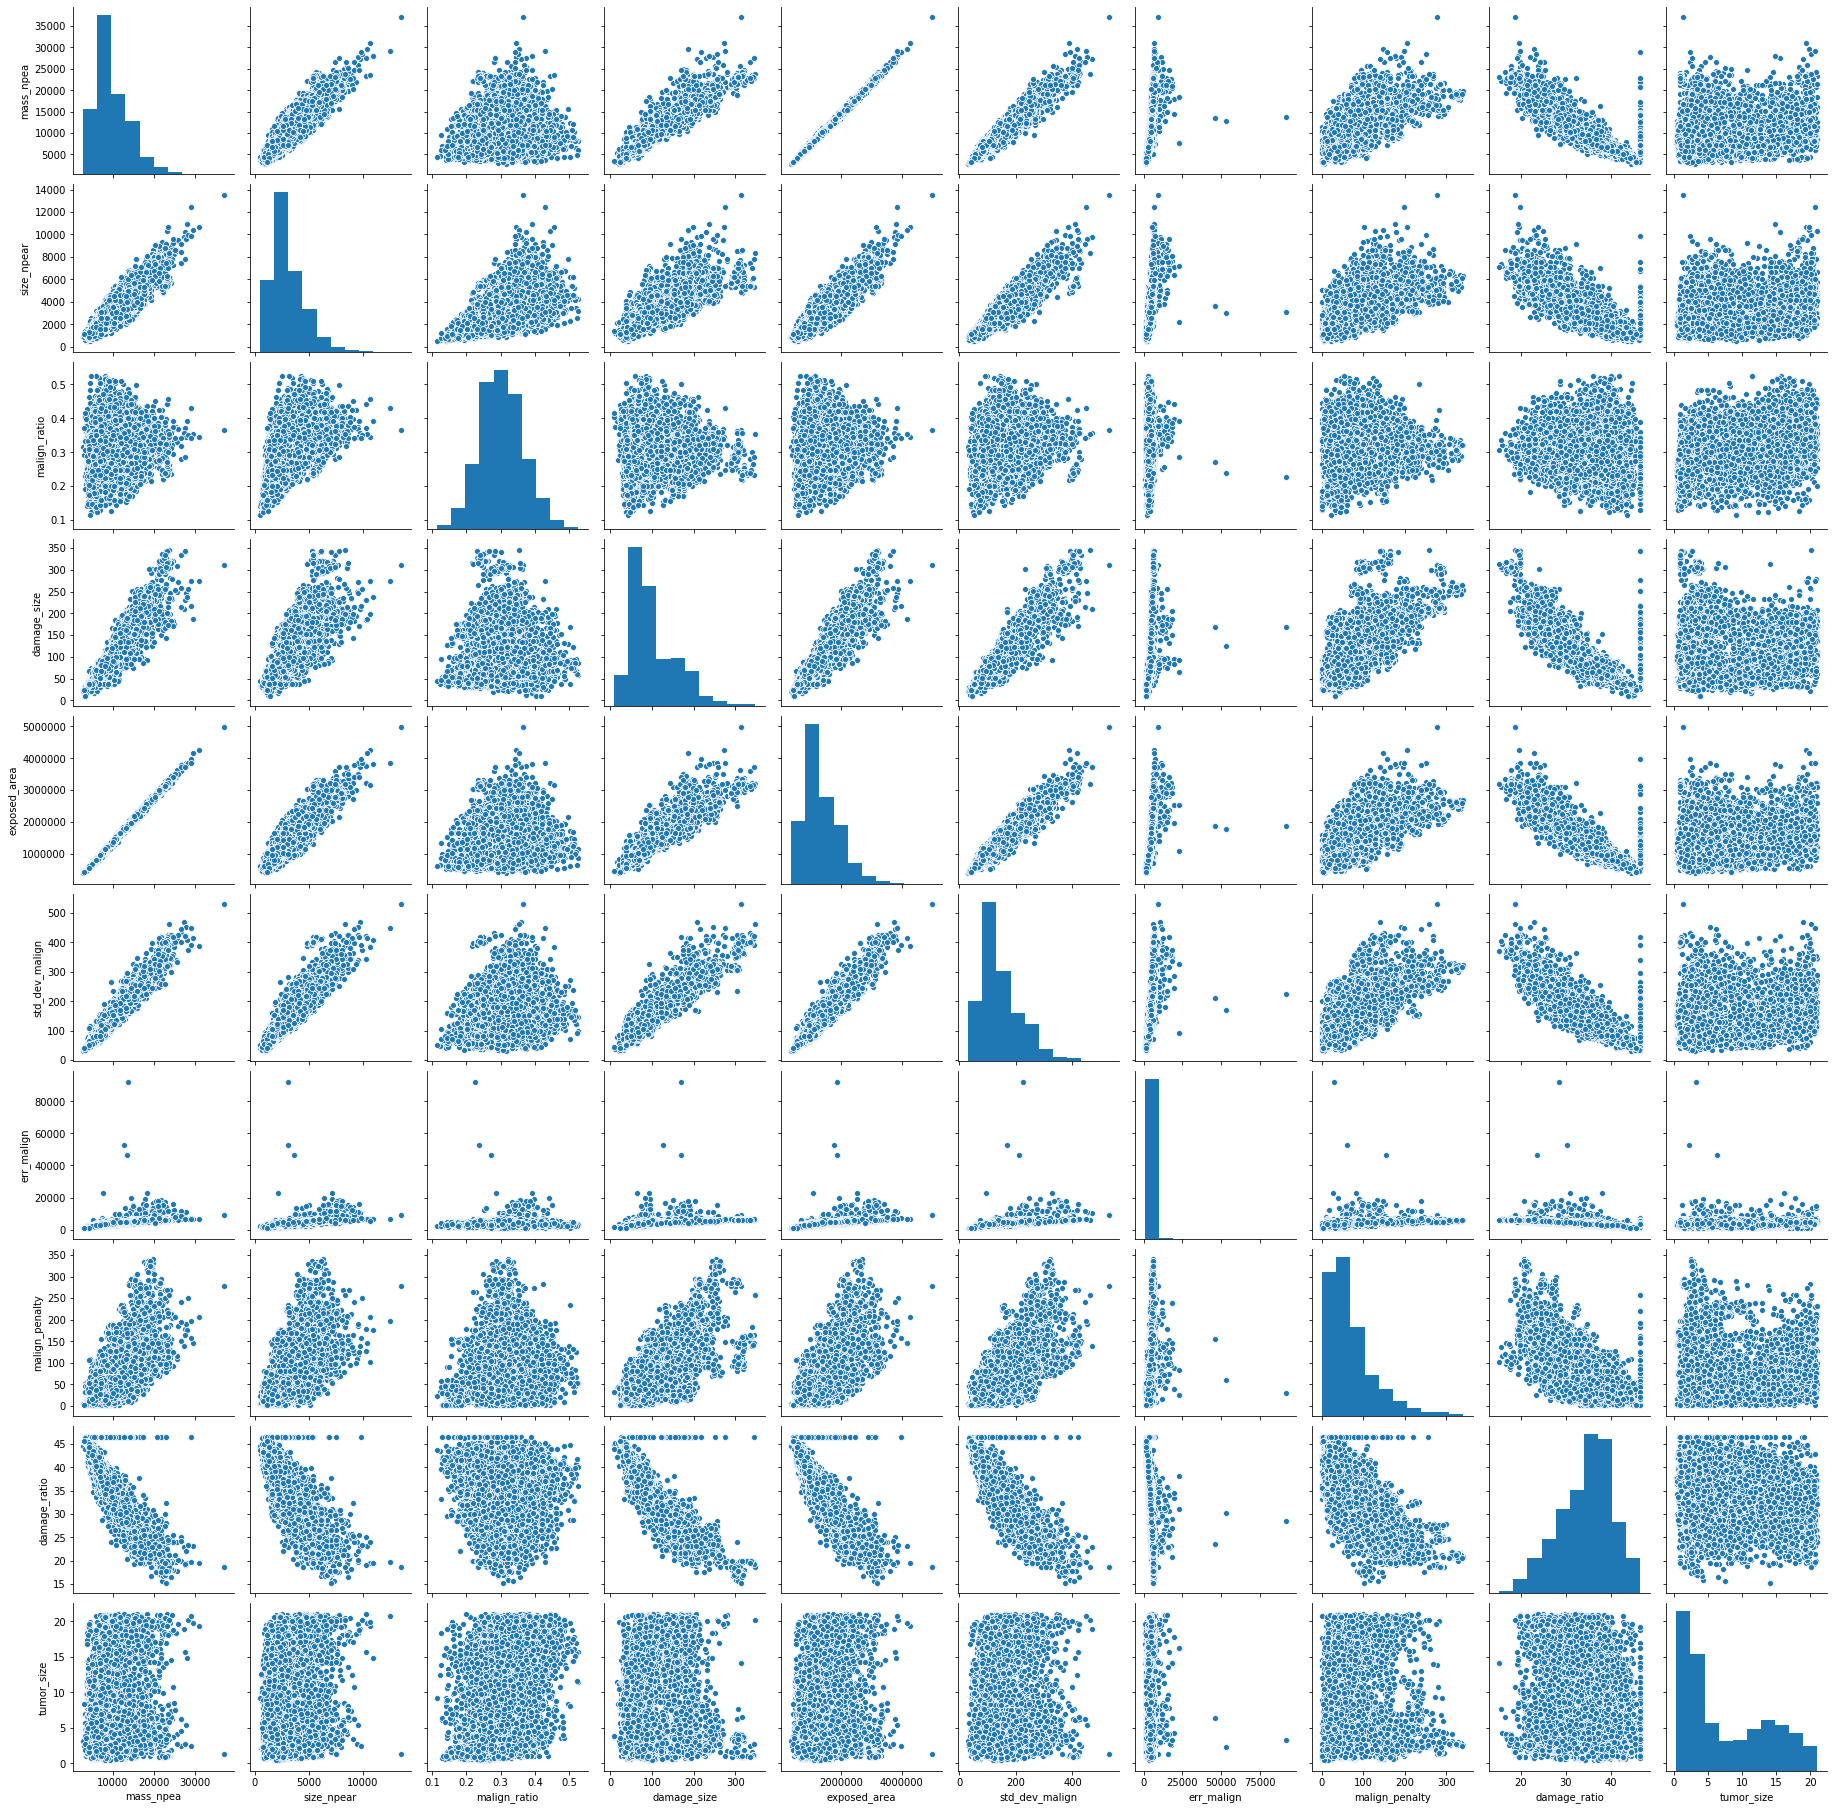

In [19]:
sns.pairplot(data_train)

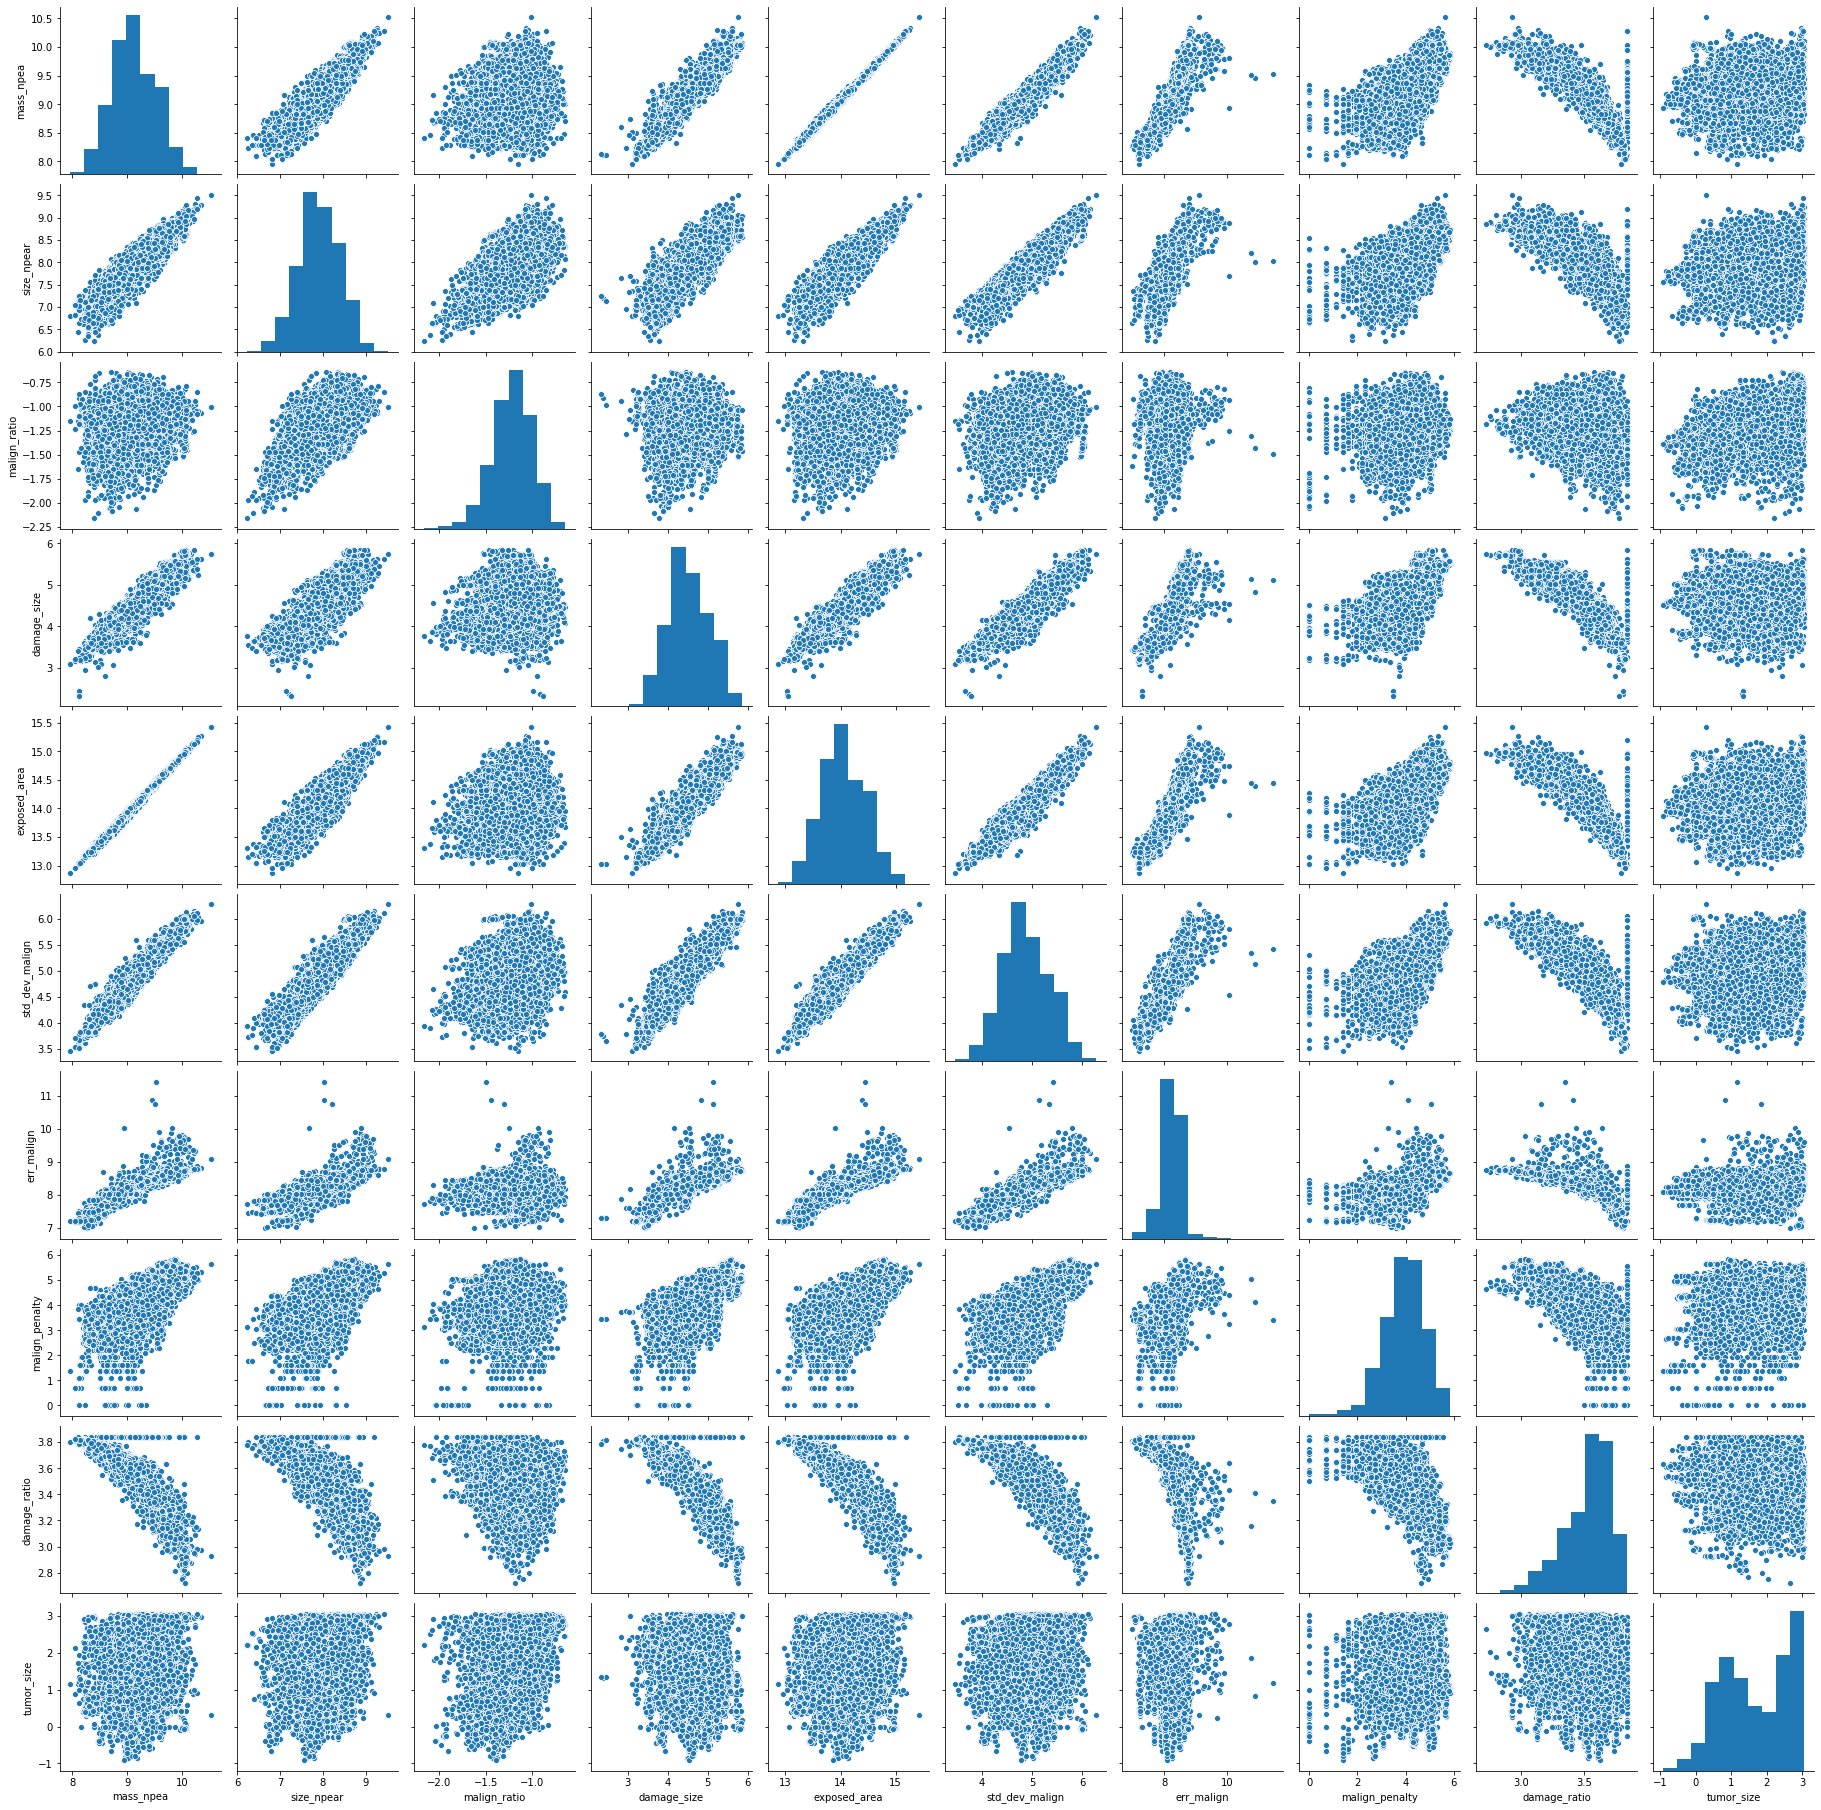

In [20]:
sns.pairplot(train_log)

# Feature Selection

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
x = train_log.iloc[:,:9] #independent columns
y = train_log.iloc[:,-1]

In [26]:
bestfeatures = SelectKBest(score_func=f_regression, k=9)
fit = bestfeatures.fit(x,y)

In [27]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [28]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 

In [31]:
featureScores

Specs        Score
0       mass_npea     8.337075
1      size_npear   185.460513
2    malign_ratio  1447.127983
3     damage_size   283.887062
4    exposed_area     9.097455
5  std_dev_malign    21.718967
6      err_malign     9.198714
7  malign_penalty    73.667448
8    damage_ratio    79.631262

# Model Preparation 

## Pycaret
#### PyCaret is an open source low-code machine learning library in Python that aims to reduce the hypothesis to insights cycle time in a ML experiment. It enables data scientists to perform end-to-end experiments quickly and efficiently. In comparison with the other open source machine learning libraries, PyCaret is an alternate low-code library that can be used to perform complex machine learning tasks with only few lines of code. PyCaret is simple and easy to use. All the operations performed in PyCaret are automatically stored in a custom Pipeline that is fully orchestrated for deployment. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, Microsoft LightGBM, spaCy and many more.

In [32]:
!pip install pycaret

In [33]:
from pycaret.regression import *

### Creating the Setup

In [34]:
exp_reg = setup(train_log, target = 'tumor_size', train_size=0.8)

 
Setup Succesfully Completed.


## Comparing the Models to the know the best one

In [35]:
best = compare_models()

## Checking the performance of the model using Learning Curve

In [41]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor()
x_train = train_log.iloc[:,:9].values
y_train = train_log.iloc[:,-1].values

In [42]:
train_sizes, train_scores, valid_scores = learning_curve(
ExtraTreesRegressor() , x_train, y_train, train_sizes=np.linspace(0.01, 1.0, 10), scoring='neg_root_mean_squared_error', cv=10)

In [43]:
train_scores_mean = -train_scores.mean(axis = 1)
valid_scores_mean = -valid_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean valid scores\n\n',pd.Series(valid_scores_mean, index = train_sizes))

Mean training scores

 82      2.918956e-15
987     2.574127e-15
1893    2.580755e-15
2798    2.572505e-15
3703    1.781174e-04
4609    7.220923e-03
5514    1.305571e-02
6420    1.212017e-02
7325    1.134677e-02
8231    1.070409e-02
dtype: float64

 --------------------

Mean valid scores

 82      0.808282
987     0.673809
1893    0.627070
2798    0.601673
3703    0.586312
4609    0.571009
5514    0.561512
6420    0.552900
7325    0.545650
8231    0.539144
dtype: float64


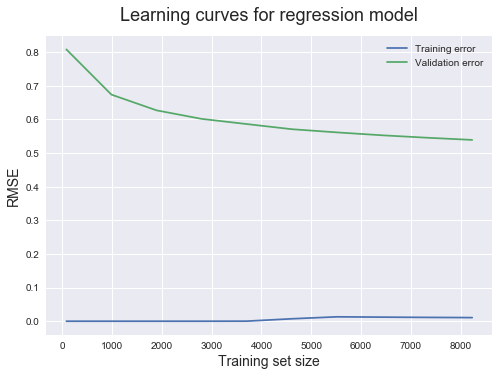

In [44]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, valid_scores_mean, label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for regression model', fontsize = 18, y = 1.03)
plt.legend()

### From the above plot it can be concluded that my model is performing better having RMSE of ~0.5 means model is good 

## Now moving on to predict the "tumor_size" from the test data we have
## Applying same all operations

In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36584 entries, 0 to 36583
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       36584 non-null  float64
 1   size_npear      36584 non-null  float64
 2   malign_ratio    36584 non-null  float64
 3   damage_size     36584 non-null  float64
 4   exposed_area    36584 non-null  float64
 5   std_dev_malign  36584 non-null  float64
 6   err_malign      36584 non-null  float64
 7   malign_penalty  36584 non-null  int64  
 8   damage_ratio    36584 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 2.5 MB


In [46]:
test.describe()

mass_npea    size_npear  malign_ratio   damage_size  exposed_area  \
count  36584.000000  36584.000000  36584.000000  36584.000000  3.658400e+04   
mean    9863.733201   3013.502009      0.302219    103.390012  1.367263e+06   
std     4057.545455   1464.816338      0.062973     55.417297  5.638794e+05   
min     2392.050000    403.500000      0.092500     11.096100  3.194902e+05   
25%     6925.620000   1977.807500      0.258680     63.450275  9.522376e+05   
50%     8899.305000   2664.105000      0.299940     87.635250  1.237236e+06   
75%    12127.625000   3777.537500      0.342873    133.496000  1.690452e+06   
max    40034.900000  15312.000000      0.577690    369.317000  5.472011e+06   

       std_dev_malign     err_malign  malign_penalty  damage_ratio  
count    36584.000000   36584.000000    36584.000000  36584.000000  
mean       145.471517    3988.960923       70.006424     34.539167  
std         69.870382    2043.358639       56.669800      5.981472  
min         32.865300       0.000000        0.000000     15.312300  
25%         94.557150    3161.480000       31.000000     30.451775  
50%        126.184500    3838.820000       54.000000     35.310750  
75%        181.273750    4638.547500       91.000000     38.880025  
max        598.408000  105948.170000      350.000000     55.300900

In [49]:
test['err_malign'][test['err_malign']==0] = 1
test['malign_penalty'][test['malign_penalty']==0] = 1
test_log = test.apply(np.log)
test_log.describe()

mass_npea    size_npear  malign_ratio   damage_size  exposed_area  \
count  36584.000000  36584.000000  36584.000000  36584.000000  36584.000000   
mean       9.118270      7.899214     -1.219074      4.508157     14.048983   
std        0.393531      0.476450      0.215164      0.507326      0.396730   
min        7.779906      6.000176     -2.380547      2.406594     12.674482   
25%        8.842983      7.589744     -1.352164      4.150257     13.766570   
50%        9.093728      7.887623     -1.204173      4.473183     14.028391   
75%        9.403241      8.236828     -1.070397      4.894072     14.340507   
max       10.597507      9.636392     -0.548718      5.911655     15.515157   

       std_dev_malign    err_malign  malign_penalty  damage_ratio  
count    36584.000000  36584.000000    36584.000000  36584.000000  
mean         4.873224      8.234121        3.925966      3.525486  
std          0.460357      0.325342        0.866568      0.187641  
min          3.492417      0.000000        0.000000      2.728656  
25%          4.549204      8.058796        3.433987      3.416144  
50%          4.837745      8.252920        3.988984      3.564187  
75%          5.200008      8.442157        4.510860      3.660481  
max          6.394273     11.570705        5.857933      4.012789

In [54]:
x_test = test_log.values
reg.fit(x_train,y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [56]:
y_pred = reg.predict(x_test)

array([5.60950692, 7.9925271 , 2.2640947 , ..., 3.21244161, 9.7287979 ,
       2.52057335])

In [57]:
Y_pred = np.exp(y_pred)
Y_pred

array([5.60950692, 7.9925271 , 2.2640947 , ..., 3.21244161, 9.7287979 ,
       2.52057335])

## Predicted values in their original form